#### Lungs Cancer & AI in Healthcare
Lung cancer is one of the most deadly types of cancer in the world, mostly because it spreads quickly and is diagnosed too late.  Improving patient survival rates requires early diagnosis, but conventional techniques, such as manual CT scan analysis, can be laborious and prone to human error.  Artificial Intelligence (AI) has become a disruptive force in healthcare in recent years, especially in the field of medical imaging.  Artificial intelligence (AI)-powered solutions, particularly those built on deep learning, are able to swiftly and precisely evaluate vast amounts of scan data, spotting minute patterns that human eyes might overlook.  AI has the potential to improve early detection of lung cancer, shorten diagnostic wait times, and help physicians make more informed decisions more quickly, all of which would improve patient outcomes.

#### Problem Statement 
- Lung cancer remains a leading cause of cancer-related deaths globally, and while early detection significantly improves survival rates, traditional diagnostic methods like chest X-rays and basic CT scans are often inefficient, subjective, and prone to missing early-stage signs. The growing availability of imaging data and advancements in deep learning offer a promising solution for automating early lung cancer detection. However, current AI models face challenges such as difficulty distinguishing between benign and malignant nodules, high false-positive rates, poor generalizability, and lack of transparency, limiting clinical trust. This research proposes a robust deep learning framework using CNNs and attention mechanisms, combined with multi-scale feature extraction and explainable AI, to enhance detection accuracy and reliability while bridging the gap between AI innovations and real-world clinical application.


#### About Data Sets 

#### Aims and Objective 
The primary proposed or aims of conducting research over this project topic is to build the better classification and detection system based on the advanced deep learning model that improves the early detection of lung cancer from CT scans image, history of patients by enhancing model accuracy, depreciating false positives, and providing interpretable predictions to assist clinical persons in decision-making and improving patient outcomes. Following bullets points represents the objective of the conducting research. 

 -	To collect and preprocess a comprehensive dataset of CT scans with annotated lung cancer cases. 
 -	To design and implement a deep learning model (e.g., CNN models) for feature extraction and classification. 
 -	To evaluate the model’s performance using appropriate metrics (accuracy, sensitivity, specificity, AUC, etc.). 
 -	To compare the proposed model with existing state-of-the-art methods. 
 -	To assess the model’s potential for integration into clinical workflows for early lung cancer screening. 


In [1]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#Sklearn -libraries 
from sklearn.model_selection import train_test_split
#To balance datasets 
from sklearn.utils import class_weight
#Open CV
import cv2
#Tensorflow and keras Library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings('ignore')

In [2]:
bengin_path = r'./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Bengin cases'
malignant_path = r'./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Malignant cases'
normal_path = r'./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Normal cases'

img_classes = ["Bengin cases", "Malignant cases", "Normal cases"] # Categories 
path_list = [bengin_path, malignant_path, normal_path]

In [3]:
img_path = []
class_labels = []
for i, dir_list in enumerate(path_list):
    name_img = os.listdir(dir_list)
    for name_file in name_img:
        img = os.path.join(dir_list,name_file)
        img_path.append(img)
        class_labels.append(img_classes[i])

df = pd.DataFrame({"img_path" : img_path,
                  "label" : class_labels})

df.head()


,img_path,label
0,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Bengin cases
1,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Bengin cases
2,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Bengin cases
3,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Bengin cases
4,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Bengin cases


In [4]:
df.describe()

,img_path,label
count,1933,1933
unique,1933,3
top,./NIDCH-Dhaka-Lungs-Cancer-Datasets/Dataset/Be...,Malignant cases
freq,1,1050


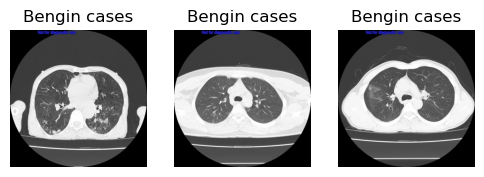

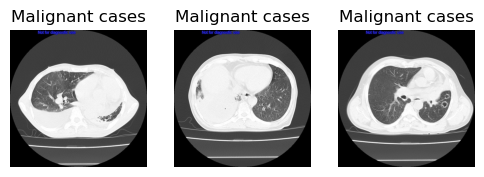

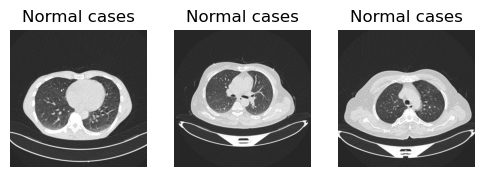

In [5]:
for category, group in df.groupby("label"):
    fig, ax = plt.subplots(1,3, figsize = (6,6))
    ax = ax.ravel()
    for i, (_,r) in enumerate(group.sample(3).iterrows()):
        img = cv2.imread(r.img_path)
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(r.label)
    plt.show()

#### Exploratory Data Analysis 

In [6]:
countData = df["label"].value_counts().reset_index()
fig = px.histogram(data_frame = countData, x = "label", y = "count", width=600,
    height=400,
    title="Count of Labels by Category")
fig.show()

#### Analyzing the Image properties 

In [7]:
sizes = []
resolutions = []
color_distributions = []

for img_path in df ["img_path"]:
    # load image 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #code to get image size
    size = os.path.getsize(img_path)
    sizes.append(size)
    #Extract the resolutions of images
    resolution = img.shape[:2]
    resolutions.append(resolution)
    #Extract color distribution
    mean_color_distributions = np.bincount(img.flatten(), minlength= 256)
    color_distributions.append(mean_color_distributions)
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

#### Distributions Size of image

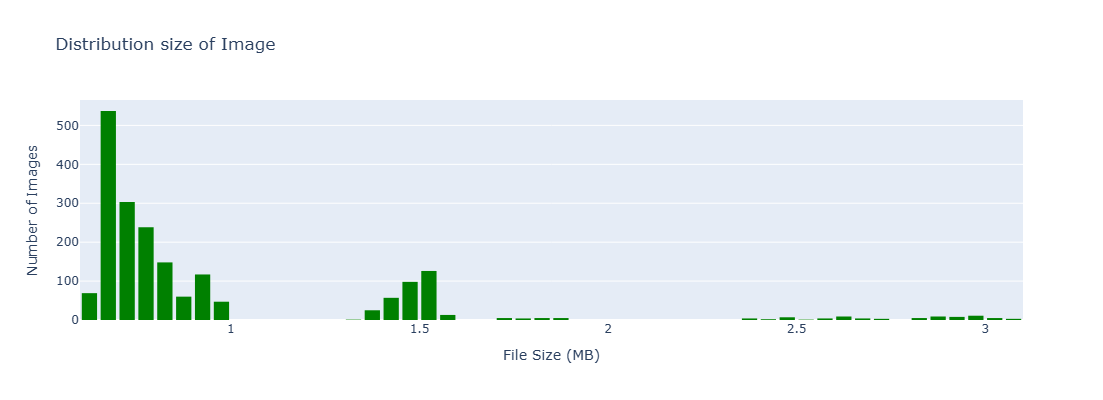

In [8]:
#Image sizes in MB
sizes_MB = []
for img_path in df["img_path"]:
    #code to load image
    img = cv2.imread(img_path)
    #code to get imge size 
    size = os.path.getsize(img_path)
    sizes_MB.append(size/1_00_000)

fig = px.histogram(x=sizes_MB, nbins = 50, title = "Distribution size of Image", width=600,
    height=400)
fig.update_layout(xaxis_title = "File Size (MB)",
                  yaxis_title = "Number of Images",
                  showlegend = False,
                  bargap = 0.1,
                  bargroupgap = 0.1)
fig.update_traces(marker = dict(color="green"))
fig.show()

#### Distributions of image Resulations 

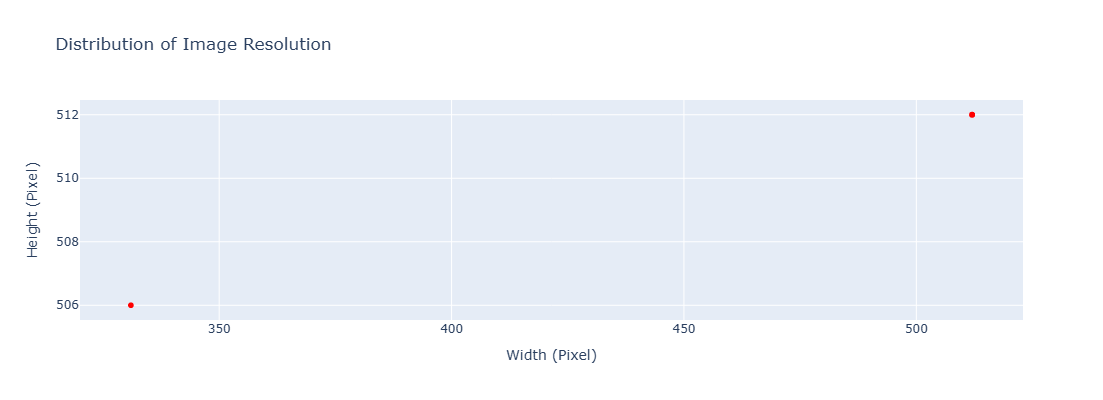

In [9]:
fig = px.scatter(x = resolutions[:,0],
                 y = resolutions[:,1], 
                 title = "Distribution of Image Resolution", height= 400, width= 600)
fig.update_layout(
    xaxis_title = "Width (Pixel)",
    yaxis_title = "Height (Pixel)",
    showlegend = False,
    hovermode = "closest"
)
fig.update_traces(marker = dict(color="red"))
fig.show()

### Mean Color Distributins 

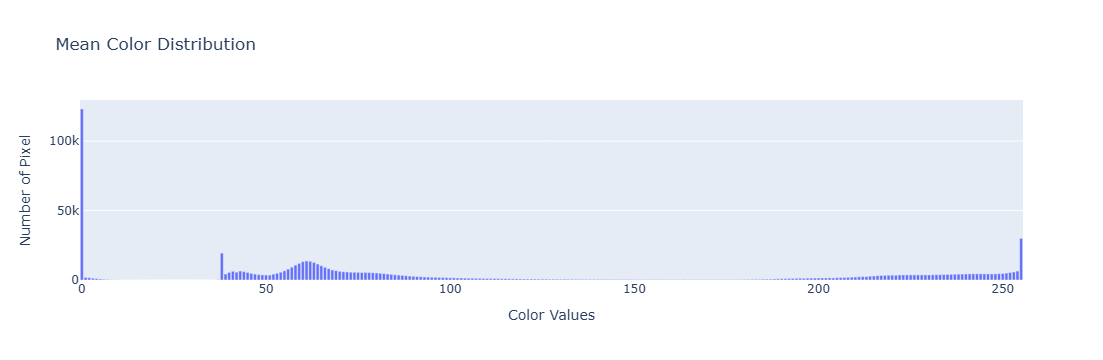

In [10]:
import plotly.graph_objects as go
mean_color_distributions = np.mean(color_distributions, axis = 0)
fig = go.Figure(
    go.Bar(x = np.arange(256), y = mean_color_distributions, name = "Mean Color Distributions"
))
fig.update_layout(
    title = "Mean Color Distribution",
    xaxis_title = "Color Values",
    yaxis_title = "Number of Pixel"
)
fig.show()

#### Train & test 

In [11]:
train_ratio = 0.70
test_ratio = 0.15
val_ratio = 0.15

df_train, df_test_val = train_test_split(df, train_size = train_ratio, random_state = 42)
df_test, df_val = train_test_split(df_test_val, train_size = test_ratio/(test_ratio + val_ratio), random_state = 42)

print(f"Train shape = {df_train.shape}")
print(f"Test shape = {df_test.shape}")
print(f"Validation shape = {df_val.shape}")

Train shape = (1353, 2)
Test shape = (290, 2)
Validation shape = (290, 2)


#### DeNoise image using median blur

In [12]:
def preprocessing_denoise(img):
    denoise_img = cv2.medianBlur(img, 1)
    denoise_img = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2RGB)
    return denoise_img

#### Data Agrumendations using ImageDataGenerator


In [13]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

image_size = (IMG_WIDTH, IMG_HEIGHT)
batch_size = 32

TRAIN_DATAGEN = ImageDataGenerator(rescale = 1./255.,
                                   preprocessing_function = preprocessing_denoise,
                                  rotation_range = 30,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.2,
                                  shear_range = 0.1,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )


TEST_DATAGEN = ImageDataGenerator(rescale = 1./255.)

#for training image 
train_generator = TRAIN_DATAGEN.flow_from_dataframe(
    df_train,
    x_col = "img_path",
    y_col = "label",
    traget_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb', 
    class_mode = "categorical",
    shuffle = True
)

# for testing image 
test_generator = TEST_DATAGEN.flow_from_dataframe(
    df_test,
    x_col = "img_path",
    y_col = "label",
    traget_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb', 
    class_mode = "categorical",
    shuffle = True
)

val_generator = TEST_DATAGEN.flow_from_dataframe(
    df_val,
    x_col = "img_path",
    y_col = "label",
    traget_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb', 
    class_mode = "categorical",
    shuffle = True
)


Found 1353 validated image filenames belonging to 3 classes.
Found 290 validated image filenames belonging to 3 classes.
Found 290 validated image filenames belonging to 3 classes.


#### Class weight 

In [14]:
#The datasets is hightly imblace so we used Class weight for balancing the datasets 

#image categories
classes = list(train_generator.class_indices.keys())

class_weights = class_weight.compute_class_weight(
           class_weight = 'balanced',
            classes = np.unique(train_generator.classes),
            y = train_generator.classes)
train_class_weights = dict(enumerate(class_weights))

#classes = list(train_generator.class_indices.keys())
for idx, weight, in train_class_weights.items():
    class_name = classes[idx]
    print(f"{class_name} : {weight}")

Bengin cases : 1.3666666666666667
Malignant cases : 0.6186556927297668
Normal cases : 1.534013605442177


#### Model  Implementations CNN Model 

In [15]:

model_2D = Sequential([
    # Conv Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256, 3)),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Conv Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Conv Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Conv Block 4
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Conv Block 5
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Conv Block 6
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(256, activation='relu'),
    Dropout(0.25),

    Dense(3, activation='softmax')  # Assuming 3 classes
]) 

model_2D.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,215,555 (4.64 MB)

 Trainable params: 1,213,763 (4.63 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [16]:
model_2D.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(learning_rate = 0.0002),
    metrics = ["accuracy"],
)
epochs = 60
history = model_2D.fit(train_generator,
                   steps_per_epoch = len(train_generator),
                   batch_size = 32,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   class_weight = train_class_weights,
                   callbacks=[
                               EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True),
                               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, mode='min')
                              ],
                   epochs = epochs)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 352s 8s/step - accuracy: 0.6053 - loss: 0.6901 - val_accuracy: 0.2172 - val_loss: 2.6680 - learning_rate: 2.0000e-04
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 337s 8s/step - accuracy: 0.7518 - loss: 0.4139 - val_accuracy: 0.2172 - val_loss: 5.6070 - learning_rate: 2.0000e-04
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 304s 7s/step - accuracy: 0.8112 - loss: 0.3207 - val_accuracy: 0.2172 - val_loss: 7.9121 - learning_rate: 2.0000e-04
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 311s 7s/step - accuracy: 0.8394 - loss: 0.2917 - val_accuracy: 0.2172 - val_loss: 6.1941 - learning_rate: 2.0000e-04
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 292s 7s/step - accuracy: 0.8161 - loss: 0.3194 - val_accuracy: 0.2172 - val_loss: 10.8035 - learning_rate: 2.0000e-04
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - accuracy: 0.8461 - loss: 0.2681 - val_accuracy: 0.2172 - val_loss: 9.0252 - learning_rate: 4.0000e-05


##### Training & validation Acuracy loss

In [17]:
def history_plot(epochs, history):
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x = np.arange(1,epochs+1), y = history.history["accuracy"], name = "Training Accuracy"))
    fig1.add_trace(go.Scatter(x = np.arange(1,epochs+1), y = history.history["val_accuracy"], name = "Validation Accuracy"))
    fig1.update_layout(title = "Training and Validation Accuracy", xaxis_title = "Epoch", yaxis_title = "Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x = np.arange(1,epochs+1), y = history.history["loss"], name = "Training Loss"))
    fig2.add_trace(go.Scatter(x = np.arange(1,epochs+1), y = history.history["val_loss"], name = "Validation Loss"))
    fig2.update_layout(title = "Training and Validation Loss", xaxis_title = "Epoch", yaxis_title = "Loss")
    fig2.show()

history_plot(epochs, history)

In [18]:
def evaluate_model(model, test_generator):
    #Calculate test loss and accuracy
    results = model.evaluate(test_generator, verbose = 0)
    print(f"Test Loss = {results[0]}")
    print(f"Test Accuracy = {results[1]}")
evaluate_model(model_2D, test_generator)

Test Loss = 2.7172939777374268
Test Accuracy = 0.20344828069210052


#### Transfer learning for improving Accuray (using Fine tune Model Vgg16 and InceptionsV3)

In [19]:
#Define base_model of InceptionV3
base_model = InceptionV3(input_shape = (256,256,3), include_top = False, weights = "imagenet")
#Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

#Add Custom layers
model_IV3 = Sequential()
model_IV3.add(Input(shape = (256,256, 3)))
model_IV3.add(base_model)
model_IV3.add(GlobalAveragePooling2D())
model_IV3.add(Dense(1024, activation = "relu"))
model_IV3.add(Dropout(0.4))
model_IV3.add(Dense(3, activation = "softmax"))
#Compile and Training the model 
epochs = 60
model_IV3.compile(optimizer = Adam(0.0002),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
history = model_IV3.fit(train_generator,
                   steps_per_epoch = len(train_generator),
                   batch_size = 64,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   class_weight = train_class_weights,
                   callbacks=[
                               EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True), 
                               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                              ],
                   epochs = epochs)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.5574 - loss: 0.9213 - val_accuracy: 0.6310 - val_loss: 0.6531 - learning_rate: 2.0000e-04
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.7613 - loss: 0.4440 - val_accuracy: 0.7724 - val_loss: 0.4596 - learning_rate: 2.0000e-04
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.7790 - loss: 0.4031 - val_accuracy: 0.8690 - val_loss: 0.3085 - learning_rate: 2.0000e-04
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.7976 - loss: 0.3710 - val_accuracy: 0.6552 - val_loss: 0.6381 - learning_rate: 2.0000e-04
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.7727 - loss: 0.3747 - val_accuracy: 0.8172 - val_loss: 0.3752 - learning_rate: 2.0000e-04
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.8301 - loss: 0.3261 - val_accuracy: 0.8172 - val_loss: 0.3818 - learning_rate: 4.0000e-05
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.8119 

In [20]:
#Plot the graph
history_plot(epochs, history)

In [21]:
evaluate_model(model_IV3, test_generator)

Test Loss = 0.36286455392837524
Test Accuracy = 0.8413792848587036


### Fine tune InceptionsV3 Model

In [22]:
# All layers does not freeze
base_model.trainable = True
#Compile the model
model_IV3.compile(optimizer = Adam(0.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
#Training the model
epochs = 60
history = model_IV3.fit(train_generator,
                   steps_per_epoch = len(train_generator),
                   batch_size = 64,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   class_weight = train_class_weights,
                   callbacks=[
                               EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True), 
                               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
                              ],
                   epochs = epochs)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7933 - loss: 0.3711 - val_accuracy: 0.8655 - val_loss: 0.3016 - learning_rate: 1.0000e-04
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.8003 - loss: 0.3806 - val_accuracy: 0.7310 - val_loss: 0.4936 - learning_rate: 1.0000e-04
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.8223 - loss: 0.3289 - val_accuracy: 0.6862 - val_loss: 0.5750 - learning_rate: 1.0000e-04
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.7871 - loss: 0.3474 - val_accuracy: 0.7724 - val_loss: 0.4496 - learning_rate: 2.0000e-05
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.8114 - loss: 0.3225 - val_accuracy: 0.8172 - val_loss: 0.3966 - learning_rate: 2.0000e-05
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.8128 - loss: 0.3430 - val_accuracy: 0.8069 - val_loss: 0.4077 - learning_rate: 4.0000e-06


In [23]:
#Plot the graph
history_plot(epochs, history)

In [24]:
evaluate_model(model_IV3, test_generator)

Test Loss = 0.3558155596256256
Test Accuracy = 0.834482729434967


### Finetune VGG16 Model 

In [25]:
#Define base mode of VGG16
base_model_vgg16 = VGG16(input_shape = (256,256, 3), include_top = False, weights = "imagenet")

#Freeze all layers VGG16 model
for layer in base_model_vgg16.layers:
    layer.trainable = False

#Add custom layers
model_VGG16 = Sequential()
model_VGG16 .add(Input(shape = (256, 256, 3)))
model_VGG16 .add(base_model)
model_VGG16 .add(GlobalAveragePooling2D())
model_VGG16 .add(Dense(1024, activation = "relu"))
model_VGG16 .add(Dropout(0.4))
model_VGG16 .add(Dense(3, activation = "softmax"))

#Compile model
model_VGG16 .compile(optimizer = Adam(0.0002),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

#Training the model
epochs = 60
history = model_VGG16 .fit(train_generator,
                   steps_per_epoch = len(train_generator),
                   batch_size = 64,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   class_weight = train_class_weights,
                   callbacks=[
                               EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True), 
                               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, mode='min') 
                              ],
                   epochs = epochs)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.5758 - loss: 0.8655 - val_accuracy: 0.7897 - val_loss: 0.4707 - learning_rate: 2.0000e-04
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 195s 5s/step - accuracy: 0.7569 - loss: 0.4410 - val_accuracy: 0.8379 - val_loss: 0.3775 - learning_rate: 2.0000e-04
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.7881 - loss: 0.4060 - val_accuracy: 0.8483 - val_loss: 0.3209 - learning_rate: 2.0000e-04
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.7972 - loss: 0.3764 - val_accuracy: 0.8034 - val_loss: 0.4170 - learning_rate: 2.0000e-04
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.8118 - loss: 0.3545 - val_accuracy: 0.8310 - val_loss: 0.3633 - learning_rate: 2.0000e-04
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.8189 - loss: 0.3374 - val_accuracy: 0.7379 - val_loss: 0.4963 - learning_rate: 2.0000e-04
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.8213 

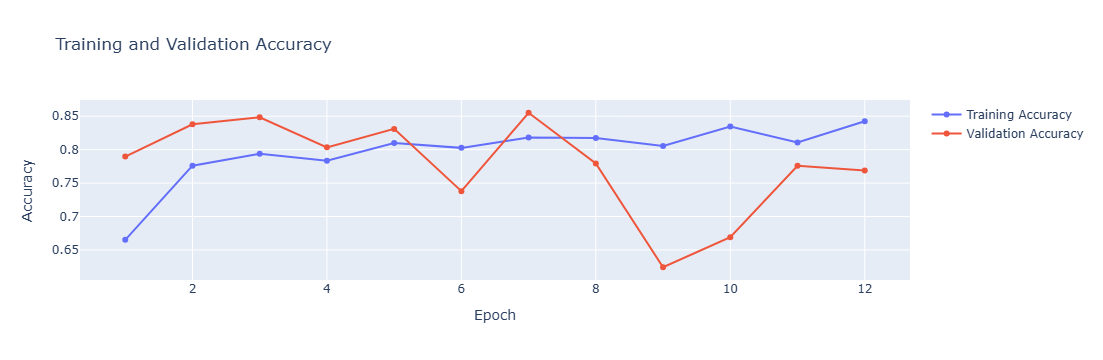

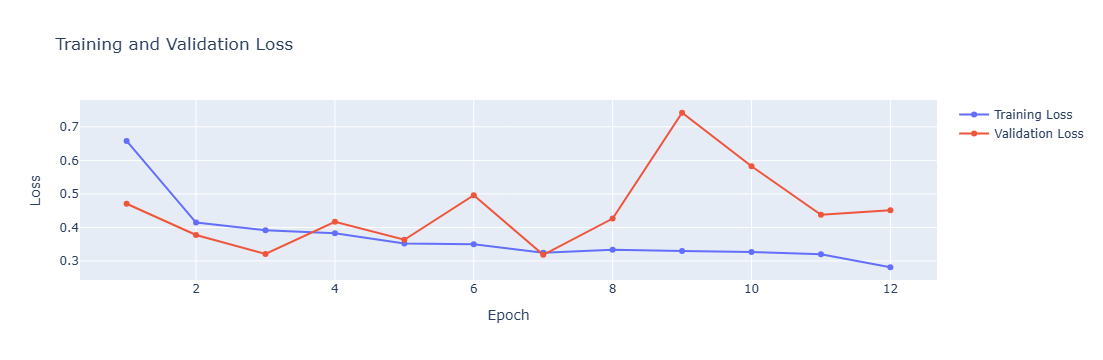

In [26]:
history_plot(epochs, history)

In [27]:
evaluate_model(model_VGG16 ,test_generator)

Test Loss = 0.34592628479003906
Test Accuracy = 0.8689655065536499


In [28]:
#Set the training layer jus block_conv1
base_model_vgg16.trainable = True
set_trainable = False
for layer in base_model_vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

#Compile the model
model_VGG16 .compile(optimizer = Adam(0.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])   
#Training the model
epochs = 60
history = model_VGG16.fit(train_generator,
                   steps_per_epoch = len(train_generator),
                   batch_size = 64,
                   validation_data = val_generator,
                   validation_steps = len(val_generator),
                   class_weight = train_class_weights,
                   callbacks=[
                               EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True), 
                               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, mode='min') 
                              ],
                   epochs = epochs)

Epoch 1/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.8280 - loss: 0.3231 - val_accuracy: 0.8448 - val_loss: 0.3438 - learning_rate: 1.0000e-04
Epoch 2/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.8297 - loss: 0.3086 - val_accuracy: 0.8552 - val_loss: 0.3430 - learning_rate: 1.0000e-04
Epoch 3/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.8413 - loss: 0.2909 - val_accuracy: 0.7655 - val_loss: 0.4784 - learning_rate: 1.0000e-04
Epoch 4/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.8445 - loss: 0.2751 - val_accuracy: 0.8552 - val_loss: 0.3236 - learning_rate: 1.0000e-04
Epoch 5/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.8329 - loss: 0.2999 - val_accuracy: 0.8310 - val_loss: 0.3546 - learning_rate: 1.0000e-04
Epoch 6/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.8516 - loss: 0.2929 - val_accuracy: 0.7310 - val_loss: 0.4802 - learning_rate: 1.0000e-04
Epoch 7/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.8271 

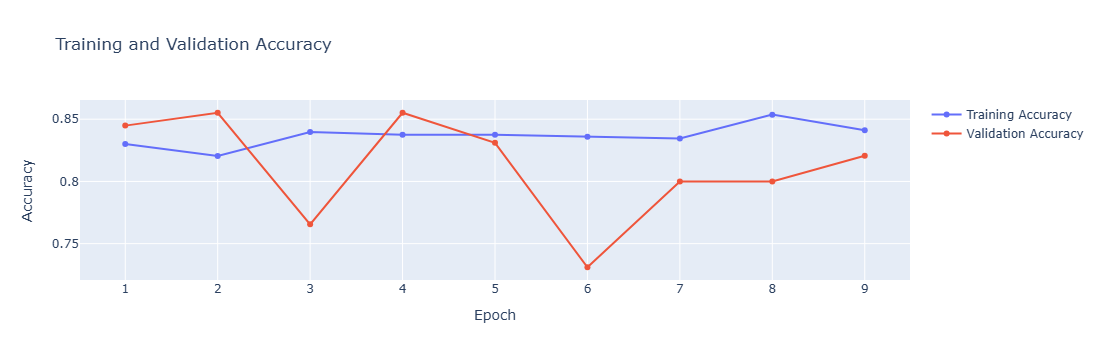

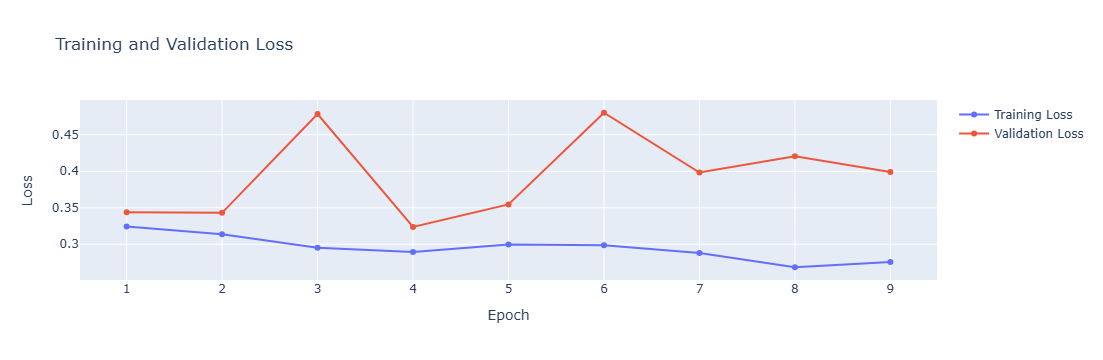

In [29]:
history_plot(epochs,history)

In [30]:
evaluate_model(model_VGG16, test_generator)

Test Loss = 0.3546402156352997
Test Accuracy = 0.8448275923728943


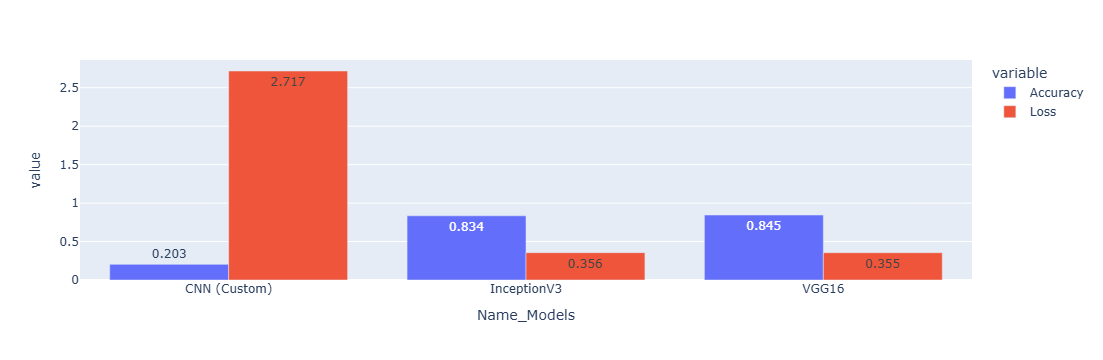

In [31]:
#Results of the model
models = [model_2D, model_IV3, model_VGG16 ]
loss = []
accuracy = []
for model in models:
    results = model.evaluate(test_generator, verbose = 0)
    loss.append(results[0])
    accuracy.append(results[1])

name_models = ["CNN (Custom)", "InceptionV3", "VGG16"]
df_loss_acc = pd.DataFrame(data = {"Name_Models" : name_models,
                                  "Loss" : loss,
                                  "Accuracy" : accuracy})

fig = px.bar(data_frame = df_loss_acc, x = "Name_Models", y = ["Accuracy", "Loss"],
            barmode = "group",
            text_auto = ".3f")
fig.show()